# 1. Các thư viện được sử dụng

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# 2. Thông tin về tập dữ liệu

## 2.1. Load 5 dòng đầu dữ liệu

In [2]:
file_path = "./data/credit_train.csv"

raw_df = pd.read_csv(file_path)

display(raw_df.head(5))

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


#### <b>Đoạn này là giới thiệu sơ bộ về dataset nhưng chưa bít viết gì</b>

## 2.2. Kiểm tra số dòng và số cột của tập dữ liệu

In [3]:
raw_df.shape

(100514, 19)

Bộ dữ liệu bao gồm:  
- 100514 dòng
- 19 cột

## 2.3. Kiểm tra các cột trong tập dữ liệu

In [4]:
display(raw_df.columns)

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

#### Thông tin về tập dữ liệu:  
<table border="1">
  <tr>
    <th>ID</th>
    <th>Cột</th>
    <th>Mô tả</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Loan ID</td>
    <td>Mã số duy nhất cho mỗi khoản vay.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Customer ID</td>
    <td>Mã số duy nhất cho mỗi khách hàng.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Loan Status</td>
    <td>Trạng thái hiện tại của khoản vay.</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Current Loan Amount</td>
    <td>Số tiền khoản vay hiện tại.</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Term</td>
    <td>Thời hạn của khoản vay (dài hạn hay ngắn hạn).</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Credit Score</td>
    <td>Điểm tín dụng của khách hàng.</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Annual Income</td>
    <td>Thu nhập hàng năm của khách hàng.</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Years in current job</td>
    <td>Số năm làm việc trong công việc hiện tại.</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Home Ownership</td>
    <td>Tình trạng sở hữu nhà ở của khách hàng.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Purpose</td>
    <td>Mục đích sử dụng khoản vay.</td>
  </tr>
  <tr>
    <td>11</td>
    <td>Monthly Debt</td>
    <td>Tổng số tiền phải trả hàng tháng (bao gồm cả khoản vay và các khoản nợ khác).</td>
  </tr>
  <tr>
    <td>12</td>
    <td>Years of Credit History</td>
    <td>Số năm có lịch sử tín dụng.</td>
  </tr>
  <tr>
    <td>13</td>
    <td>Months since last delinquent</td>
    <td>Số tháng kể từ lần trễ trả nợ cuối cùng.</td>
  </tr>
  <tr>
    <td>14</td>
    <td>Number of Open Accounts</td>
    <td>Số tài khoản thanh toán đang mở.</td>
  </tr>
  <tr>
    <td>15</td>
    <td>Number of Credit Problems</td>
    <td>Số vấn đề về tín dụng.</td>
  </tr>
  <tr>
    <td>16</td>
    <td>Current Credit Balance</td>
    <td>Tổng số tiền nợ hiện tại.</td>
  </tr>
  <tr>
    <td>17</td>
    <td>Maximum Open Credit</td>
    <td>Số tiền tín dụng tối đa mà khách hàng có thể mở.</td>
  </tr>
  <tr>
    <td>18</td>
    <td>Bankruptcies</td>
    <td>Số lần phá sản.</td>
  </tr>
  <tr>
    <td>19</td>
    <td>Tax Liens</td>
    <td>Số lần bị thu thuế đất đai.</td>
  </tr>
</table>

# 3. Kiểm tra và đánh giá sơ bộ về dữ liệu (EDA)

## 3.1. Kiểm tra dữ liệu  

### 3.1.1. Kiểm tra kiểu giá trị của dữ liệu

In [5]:
display(raw_df.dtypes)
print("\n\n")
raw_df.info()

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-n

### 3.1.2. Kiểm tra các ký tự đặc biệt cho cột kiểu object (nếu có)

In [6]:
# Lọc các cột có kiểu dữ liệu object
object_columns = raw_df.select_dtypes(include=['object']).columns

# Kiểm tra các ký tự đặc biệt trong các cột object
for column in object_columns:
    special_characters = raw_df[column].str.contains(r'[^\w\s]', na=False)
    if special_characters.any():
        print(f"Cột {column} có chứa các ký tự đặc biệt.")
        print(raw_df[column][special_characters],"\n")
    else:
        print(f"Cột {column} không chứa các ký tự đặc biệt.")

Cột Loan ID có chứa các ký tự đặc biệt.
0        14dd8831-6af5-400b-83ec-68e61888a048
1        4771cc26-131a-45db-b5aa-537ea4ba5342
2        4eed4e6a-aa2f-4c91-8651-ce984ee8fb26
3        77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a
4        d4062e70-befa-4995-8643-a0de73938182
                         ...                 
99995    3f94c18c-ba8f-45d0-8610-88a684a410a9
99996    06eba04f-58fc-424a-b666-ed72aa008900
99997    e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7
99998    81ab928b-d1a5-4523-9a3c-271ebb01b4fb
99999    c63916c6-6d46-47a9-949a-51d09af4414f
Name: Loan ID, Length: 100000, dtype: object 

Cột Customer ID có chứa các ký tự đặc biệt.
0        981165ec-3274-42f5-a3b4-d104041a9ca9
1        2de017a3-2e01-49cb-a581-08169e83be29
2        5efb2b2b-bf11-4dfd-a572-3761a2694725
3        e777faab-98ae-45af-9a86-7ce5b33b1011
4        81536ad9-5ccf-4eb8-befb-47a4d608658e
                         ...                 
99995    2da51983-cfef-4b8f-a733-5dfaf69e9281
99996    77f2252a-b7d1-4b07-a746-1202a830

#### Hai cột <b>Loan ID</b> và <b>Customer ID</b> có vẻ như không cần thiết phải thay đổi giá trị vì không cần áp dụng vào mô hình, tiến hành kiểm tra trên cột <b>Years in current job</b>

In [7]:
# Xem các giá trị duy nhất và số lượng của chúng
unique_values = raw_df['Years in current job'].value_counts()

# In ra số lượng loại dữ liệu khác nhau
num_unique_values = len(unique_values)
print("Số lượng loại dữ liệu khác nhau trong cột 'Years in current job':", num_unique_values)

# In ra các giá trị duy nhất và số lượng của chúng
print("Các giá trị duy nhất và số lượng của chúng:")
print(unique_values)

Số lượng loại dữ liệu khác nhau trong cột 'Years in current job': 11
Các giá trị duy nhất và số lượng của chúng:
Years in current job
10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: count, dtype: int64


#### Chúng ta có thể chuyển đổi các dữ liệu này trước khi tạo mô hình

### 3.1.3. Kiểm tra các dữ liệu NULL hoặc dữ liệu bị trùng lặp

In [8]:
# Kiểm tra dữ liệu bị trùng lặp
duplicate_rows = raw_df.duplicated().sum()
print("Số hàng bị trùng lặp:", duplicate_rows)

Số hàng bị trùng lặp: 10728


#### Tiến hành drop các dòng bị trùng lặp

In [9]:
# Loại bỏ các dòng dữ liệu bị trùng lặp
raw_df.drop_duplicates(inplace=True)

# Kiểm tra lại số hàng bị trùng lặp sau khi loại bỏ
duplicate_rows_after_drop = raw_df.duplicated().sum()
print("Số hàng bị trùng lặp sau khi loại bỏ:", duplicate_rows_after_drop)

Số hàng bị trùng lặp sau khi loại bỏ: 0


In [10]:
raw_df.shape

(89786, 19)

#### Kiểm tra tỉ lệ NULL của các cột

In [11]:
# Tính tỷ lệ NULL của các cột
null_ratio = (raw_df.isnull().sum() / len(raw_df)) * 100

# In ra tỷ lệ NULL của các cột
print("Tỉ lệ NULL của các cột:")
print(null_ratio)

Tỉ lệ NULL của các cột:
Loan ID                          0.001114
Customer ID                      0.001114
Loan Status                      0.001114
Current Loan Amount              0.001114
Term                             0.001114
Credit Score                    21.334061
Annual Income                   21.334061
Years in current job             4.235627
Home Ownership                   0.001114
Purpose                          0.001114
Monthly Debt                     0.001114
Years of Credit History          0.001114
Months since last delinquent    53.836901
Number of Open Accounts          0.001114
Number of Credit Problems        0.001114
Current Credit Balance           0.001114
Maximum Open Credit              0.003341
Bankruptcies                     0.212728
Tax Liens                        0.011138
dtype: float64


#### Ta thấy cột <b>Months since last delinquent</b> với hơn <b>50%</b> NULL => loại bỏ cột này, sau đó tiến hành loại bỏ các dòng NULL ở các cột còn lại

In [12]:
# Xóa cột "Months since last delinquent"
raw_df = raw_df.drop(columns=['Months since last delinquent'])

# Loại bỏ dòng NULL từ các cột có ít giá trị NULL còn lại
raw_df = raw_df.dropna(subset=[
    'Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
    'Credit Score', 'Annual Income', 'Years in current job',
    'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
    'Number of Open Accounts', 'Number of Credit Problems',
    'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'
])

# Kiểm tra kết quả sau khi loại bỏ
print(raw_df.isnull().sum())


Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64


In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67490 entries, 0 to 99998
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    67490 non-null  object 
 1   Customer ID                67490 non-null  object 
 2   Loan Status                67490 non-null  object 
 3   Current Loan Amount        67490 non-null  float64
 4   Term                       67490 non-null  object 
 5   Credit Score               67490 non-null  float64
 6   Annual Income              67490 non-null  float64
 7   Years in current job       67490 non-null  object 
 8   Home Ownership             67490 non-null  object 
 9   Purpose                    67490 non-null  object 
 10  Monthly Debt               67490 non-null  float64
 11  Years of Credit History    67490 non-null  float64
 12  Number of Open Accounts    67490 non-null  float64
 13  Number of Credit Problems  67490 non-null  float64


In [14]:
raw_df.shape

(67490, 18)

### 3.1.4. Kiểm tra describe các biến có giá trị là số

In [15]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,67490.0,1.660527e+07,3.685872e+07,15422.0,195563.50,329208.00,5.806570e+05,1.000000e+08
Credit Score,67490.0,1.125569e+03,1.561597e+03,585.0,708.00,729.00,7.420000e+02,7.510000e+03
Annual Income,67490.0,1.396654e+06,1.118572e+06,76627.0,861640.50,1198700.50,1.674774e+06,1.655574e+08
Monthly Debt,67490.0,1.866367e+04,1.226265e+04,0.0,10415.61,16377.62,2.417099e+04,4.358433e+05
Years of Credit History,67490.0,1.803651e+01,6.811087e+00,3.7,13.40,16.90,2.150000e+01,7.050000e+01
Number of Open Accounts,67490.0,1.119609e+01,5.026188e+00,1.0,8.00,10.00,1.400000e+01,7.600000e+01
Number of Credit Problems,67490.0,1.605571e-01,4.758259e-01,0.0,0.00,0.00,0.000000e+00,1.500000e+01
Current Credit Balance,67490.0,2.967699e+05,3.799046e+05,0.0,114703.00,212724.00,3.708420e+05,3.287897e+07
Maximum Open Credit,67490.0,7.546232e+05,7.461028e+06,0.0,278542.00,475651.00,7.938700e+05,1.539738e+09
Bankruptcies,67490.0,1.116462e-01,3.432102e-01,0.0,0.00,0.00,0.000000e+00,7.000000e+00


## 3.2. Phân tích đánh giá sơ bộ

#### Sự phân phối của Loan Status

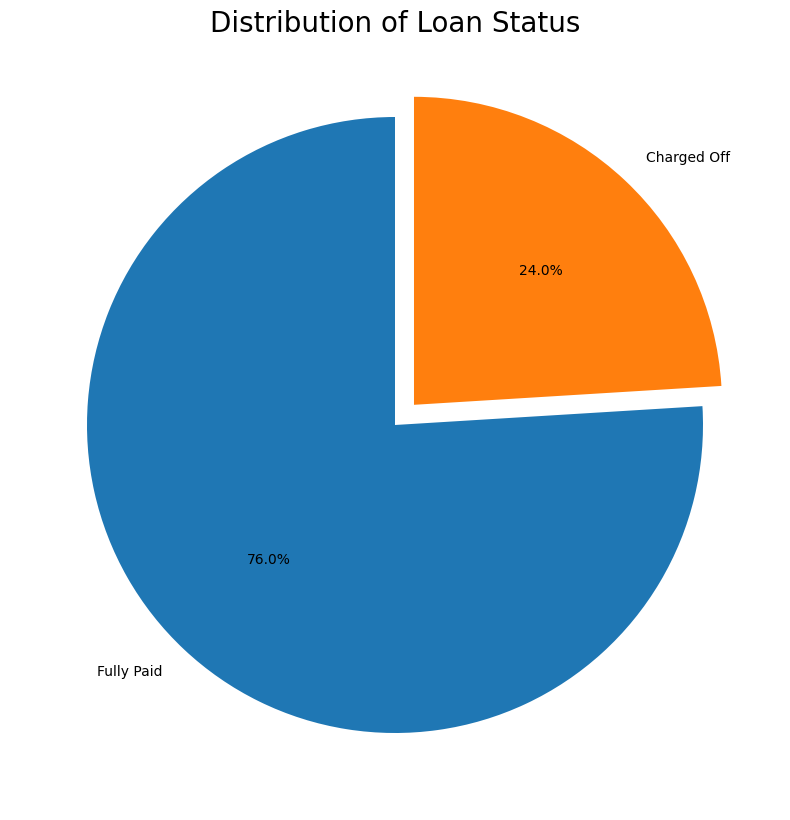

In [16]:
plt.figure(figsize=(10, 10))
plt.pie(x=raw_df['Loan Status'].value_counts(), labels=['Fully Paid', 'Charged Off'], explode=[0, 0.09],
        autopct='%1.1f%%', startangle=90)  # Thêm tham số autopct để hiển thị phần trăm
plt.title('Distribution of Loan Status', fontdict={'fontsize': 20})
plt.show()

#### Sự ảnh hưởng của Year in currrent job đến khả năng trả nợ

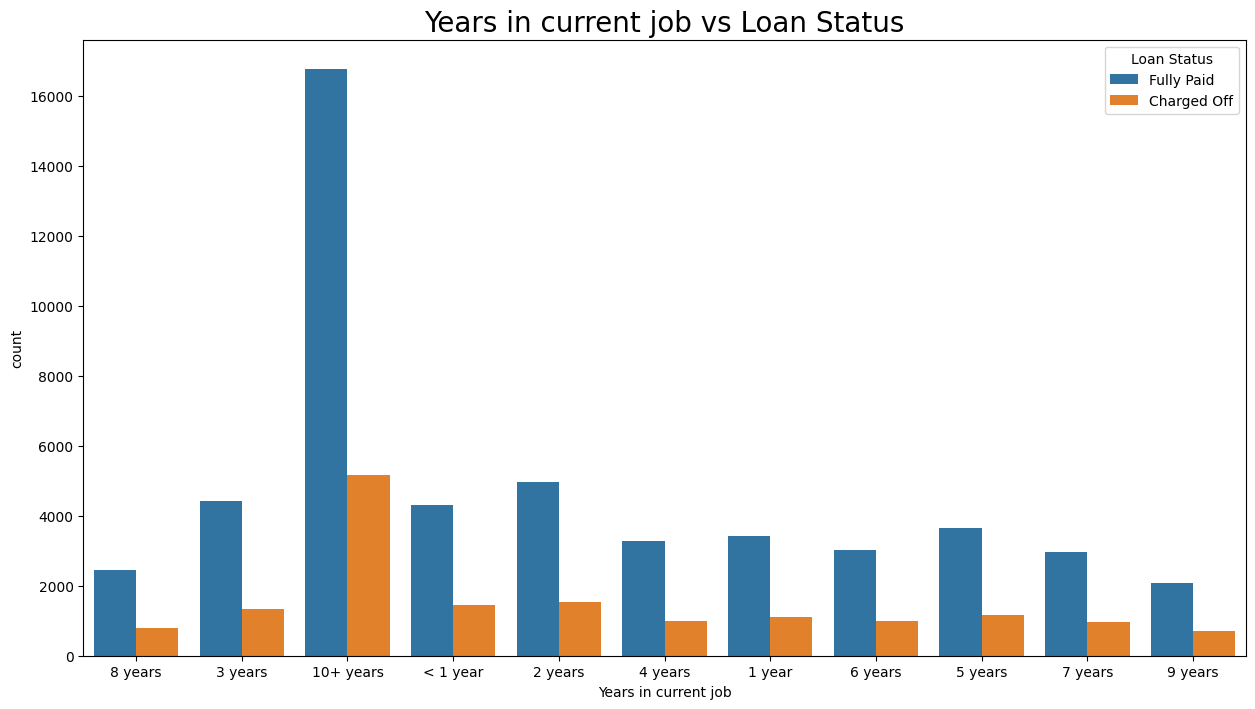

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x='Years in current job',data= raw_df,hue='Loan Status')
plt.title('Years in current job vs Loan Status',fontdict={'fontsize':20})
plt.show()

#### Khả năng thời hạn khoảng vay ảnh hưởng đến việc có thể trả nợ hay không

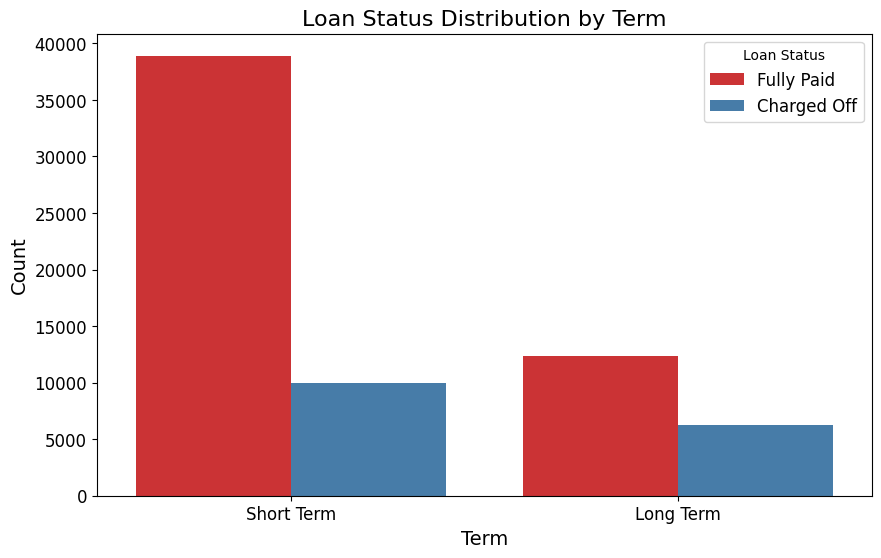

In [18]:
# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
sns.countplot(x='Term', hue='Loan Status', data=raw_df, palette='Set1')
plt.title('Loan Status Distribution by Term', fontsize=16)
plt.xlabel('Term', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Loan Status', fontsize=12)
plt.show()


#### Mục đích của việc vay tiền có ảnh hưởng đến khả năng chi trả hay không

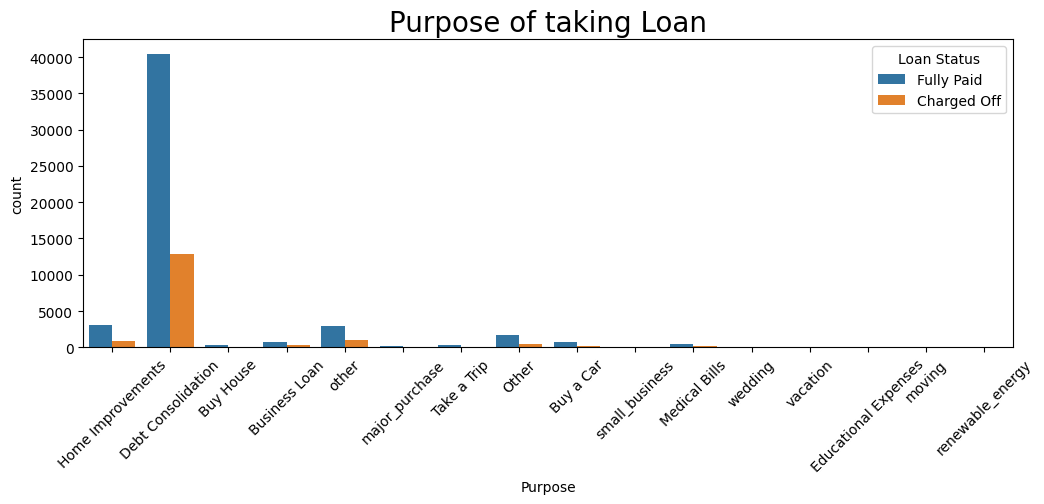

In [19]:
plt.figure(figsize=(12,4))
sns.countplot(x='Purpose',data=raw_df,hue='Loan Status')
plt.xticks(rotation=45)
plt.title('Purpose of taking Loan',fontdict={'fontsize':20})
plt.show()

#### Liệu người có quyền sở hữu nhà đất có khả năng chi trả nợ cao hơn những người khác?

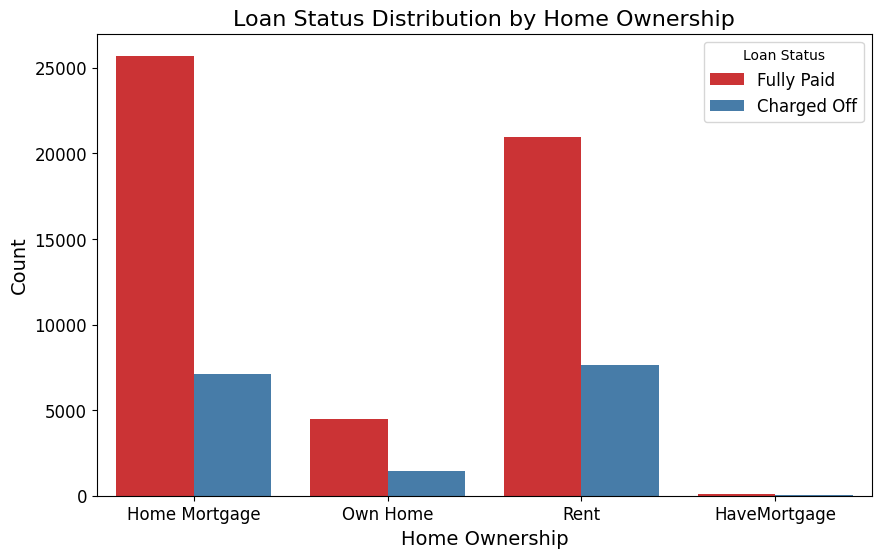

In [20]:
# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
sns.countplot(x='Home Ownership', hue='Loan Status', data=raw_df, palette='Set1')
plt.title('Loan Status Distribution by Home Ownership', fontsize=16)
plt.xlabel('Home Ownership', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Loan Status', fontsize=12)
plt.show()

# 4. Lựa chọn mô hình phân tích và kết quả

## 4.1. Mã hóa dữ liệu và Correlation

#### Mã hóa các dữ liệu dạng chữ thành dạng số

In [21]:
# Lọc ra các cột có kiểu dữ liệu là 'object'
object_columns = raw_df.select_dtypes(include=['object'])

# In ra các cột có dữ liệu dạng chữ
print("Các cột có dữ liệu dạng chữ trong raw_df:")
print(object_columns.columns.tolist())

Các cột có dữ liệu dạng chữ trong raw_df:
['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


#### Loại bỏ 2 cột <b>Loan ID</b> và <b>Customer ID</b> vì không có giá trị sử dụng trong mô hình

In [22]:
# Loại bỏ hai cột 'Loan ID' và 'Customer ID'
raw_df = raw_df.drop(['Loan ID', 'Customer ID'], axis=1)

# In ra DataFrame sau khi loại bỏ
display(raw_df.head(5))

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


#### Chuẩn hóa chuỗi

In [23]:
le = LabelEncoder()

raw_df['Loan Status']=le.fit_transform(raw_df['Loan Status'])
raw_df['Term']=le.fit_transform(raw_df['Term'])
raw_df['Years in current job']=le.fit_transform(raw_df['Years in current job'])
raw_df['Home Ownership']=le.fit_transform(raw_df['Home Ownership'])
raw_df['Purpose']=le.fit_transform(raw_df['Purpose'])

In [24]:
display(raw_df.head(5))

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,0,206602.0,1,7290.0,896857.0,1,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,1,217646.0,1,730.0,1184194.0,10,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


#### Kiểm tra giá trị ngoại lai

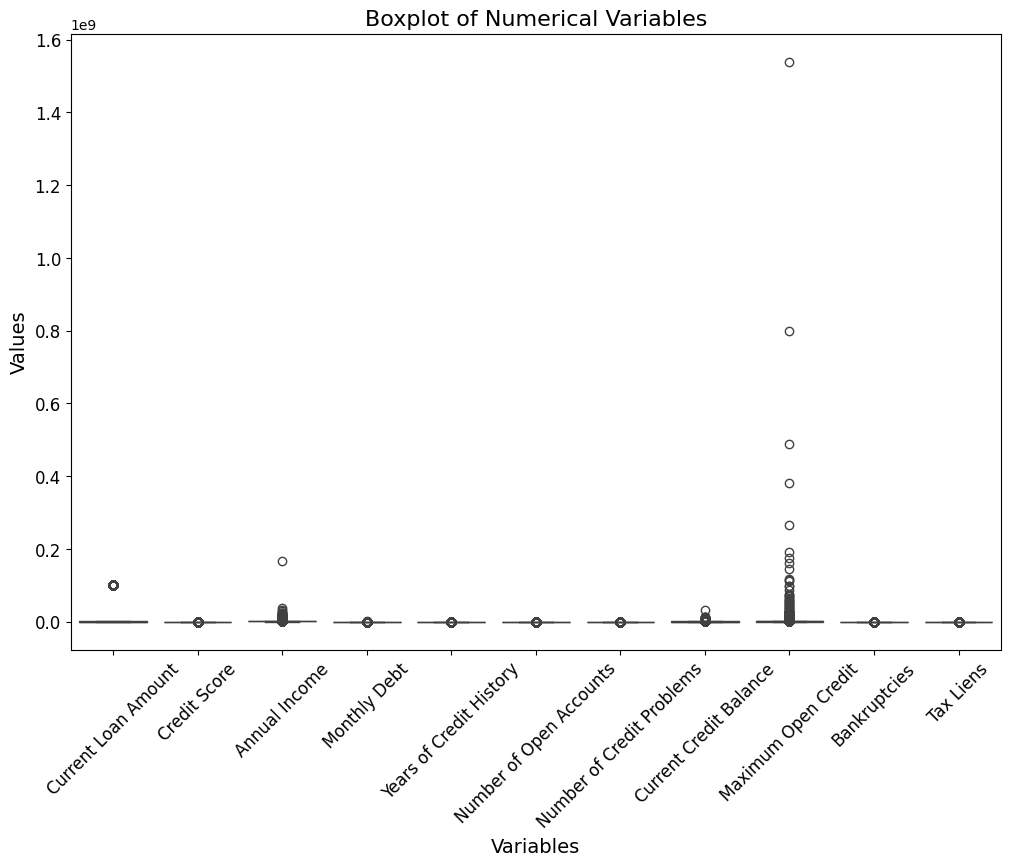

In [25]:
# Tạo biểu đồ boxplot cho các biến số
plt.figure(figsize=(12, 8))
sns.boxplot(data=raw_df.select_dtypes(include=['float64']))
plt.title('Boxplot of Numerical Variables', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#### Tính toán số lượng giá trị ngoại lai

In [26]:
# Tính toán IQR cho các biến số
Q1 = raw_df.quantile(0.25)
Q3 = raw_df.quantile(0.75)
IQR = Q3 - Q1

# Xác định các giá trị ngoại lai cho từng biến số
outliers = ((raw_df < (Q1 - 1.5 * IQR)) | (raw_df > (Q3 + 1.5 * IQR))).any(axis=1)

# In ra số lượng giá trị ngoại lai
print("Số lượng giá trị ngoại lai:", outliers.sum())


Số lượng giá trị ngoại lai: 45171


#### Xử lý các giá trị ngoại lai bằng IQR

In [27]:
def handle_outliers_iqr(df, column):
    # Tính toán Q1, Q3 và IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Xác định ngưỡng trên và ngưỡng dưới
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Loại bỏ các giá trị ngoại lai
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_filtered


In [28]:
# List các cột số cần xử lý ngoại lai
numeric_columns = raw_df.select_dtypes(include=['float64']).columns

# Xử lý ngoại lai cho từng cột số
for column in numeric_columns:
    raw_df = handle_outliers_iqr(raw_df, column)

# Hiển thị thông tin của DataFrame sau khi xử lý
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 35172 entries, 3 to 99998
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                35172 non-null  int32  
 1   Current Loan Amount        35172 non-null  float64
 2   Term                       35172 non-null  int32  
 3   Credit Score               35172 non-null  float64
 4   Annual Income              35172 non-null  float64
 5   Years in current job       35172 non-null  int32  
 6   Home Ownership             35172 non-null  int32  
 7   Purpose                    35172 non-null  int32  
 8   Monthly Debt               35172 non-null  float64
 9   Years of Credit History    35172 non-null  float64
 10  Number of Open Accounts    35172 non-null  float64
 11  Number of Credit Problems  35172 non-null  float64
 12  Current Credit Balance     35172 non-null  float64
 13  Maximum Open Credit        35172 non-null  float64


In [29]:
raw_df.shape

(35172, 16)

#### Correlation

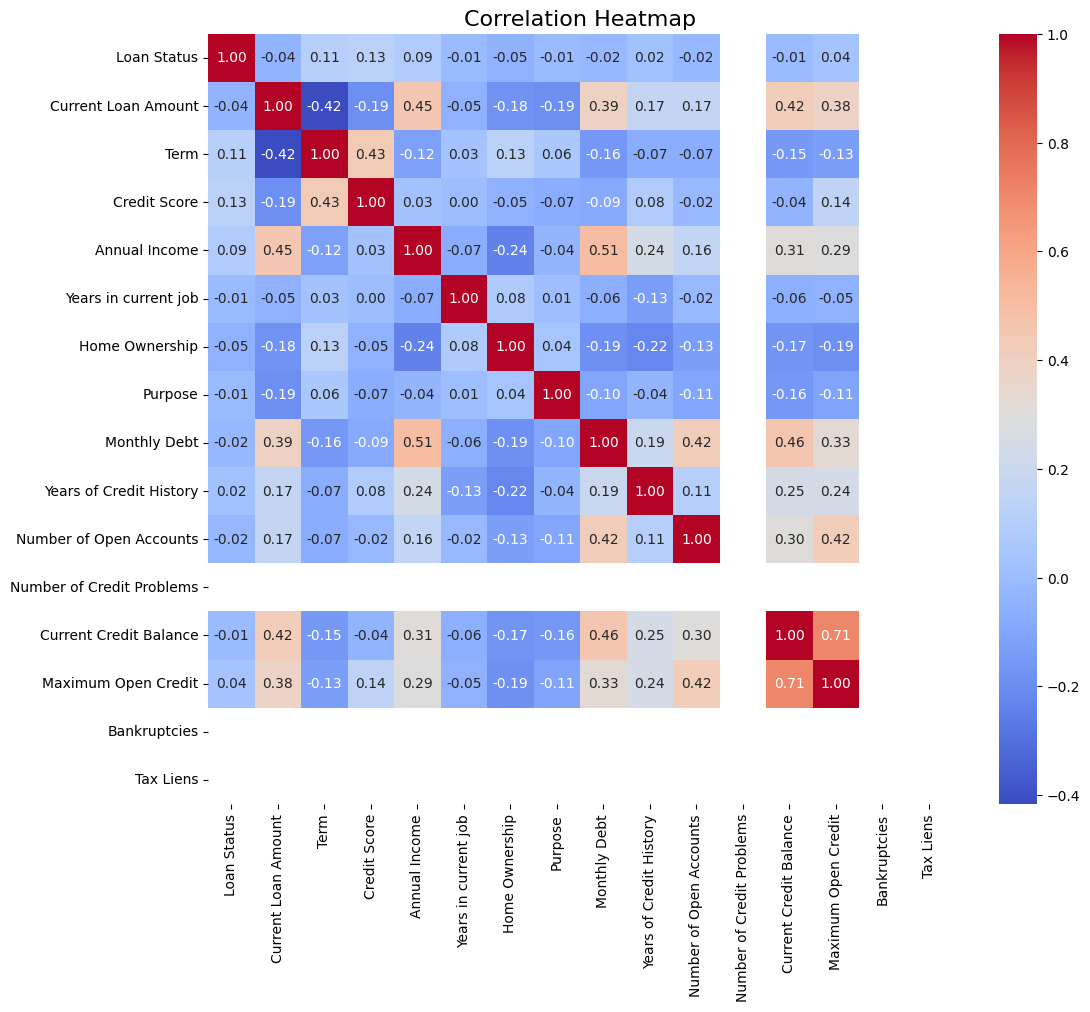

In [30]:
# Tạo correlation matrix
corr_matrix = raw_df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## 4.2. Decission Tree Model

#### Lấy features

In [31]:
X = raw_df.drop(labels='Loan Status', axis=1).values
y = raw_df['Loan Status'].values

#### Chia train, test

In [32]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state =42)

#### Xây dựng Decission Tree Model

In [33]:
dec_Tree =DecisionTreeClassifier(max_features=15 , max_depth=15, random_state=42)
dec_Tree.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=15, max_features=15, random_state=42)

#### Đánh giá mô hình

In [34]:
y_pred = dec_Tree.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7125799573560767


In [36]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.15      0.19      1575
           1       0.78      0.87      0.83      5460

    accuracy                           0.71      7035
   macro avg       0.52      0.51      0.51      7035
weighted avg       0.66      0.71      0.68      7035



In [37]:
# Tính confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Hiển thị confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 240 1335]
 [ 687 4773]]
